##### Copyright 2020 The TensorFlow Authors.

In [1]:
# 协议说明
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 使用TensorFlow 2.0以上版本中 TensorFlow Lite Model Maker 实现鲜花分类

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/examples/blob/master/lite/codelabs/flower_classification/ml/Flower_Classification_with_TFLite_Model_Maker.ipynb">      
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/examples/blob/master/lite/codelabs/flower_classification/ml/Flower_Classification_with_TFLite_Model_Maker.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
</table>

当我们希望在移动设备上部署TensorFlow神经网络模型时，对于特定的输入数据，Model Maker库可以简化模型的适配和转换工作。

这个笔记本文档显示了一个端到端示例，该示例展示了如何使用Model Maker库，将通用的图像分类模型改编和转换为适合移动设备的花朵分类模型。

## 前置条件

我们首先需要安装一些必要的包，包括Model Maker的包。Model Maker的包在这个github [仓库](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker)。

In [2]:
!pip install tflite-model-maker

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/
     |████████████████████████████████| 591 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 172 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 840 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 87 kB 1.7 MB/s eta 0:00:011
     |████████████████████████████████| 63 kB 1.4 MB/s eta 0:00:011
     |████████████████████████████████| 1.2 MB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 6.3 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 183 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 679 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 120 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.9 MB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 127 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 1.4 MB/s e

导入必要的包

In [3]:
import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.image_classifier import DataLoader

## 简单的端到端示例

### 获取（图像）数据路径

我们需要准备一些图像来运行这个例子。有几百张图像Model Maker就可以很好的工作了。不过，更多的图像可以获得更高的准确率。

In [18]:
image_path = '/openbayes/input/input0'

# 也可以使用以下代码来直接读取云端的压缩文件
# image_path = tf.keras.utils.get_file(
#       'flower_photos',
#       'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
#       untar=True)

您可以将“ image_path”替换为您自己的图像文件夹。如果想上传数据，可以在左侧边栏找到上传按钮（如下图红框所示）。可以直接上传压缩文件，上传完毕后将其解压。文件的根路径就是当前路径。

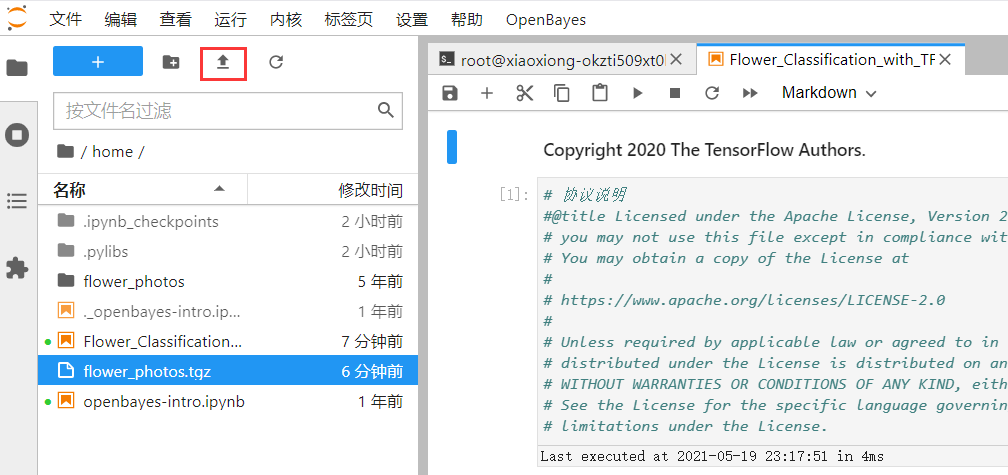

如果您不想将图像上传到云端，则可以尝试按照github中的[指南](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker)在本地运行Model Maker库。

### 运行
本示例仅包含4行代码（如下所示），每一行代表整个过程的一个步骤。

1. 加载准备的输入数据，将其拆分为训练数据和测试数据。

In [20]:
data = DataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


2. 自定义TensorFlow模型

In [21]:
model = image_classifier.create(train_data) # 默认的模型EfficientNet-Lite0

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
103/103 [==============================] - 14s 83ms/step - loss: 1.1054 - accuracy: 0.6124
Epoch 2/5
103/103 [==============================] - 8s 78ms/step - loss: 0.6569 - accuracy: 0.8986
Epoch 3/5
103/103 [==============================] - 7s 73ms/step - loss: 0.6194 - accuracy: 0.9096
Epoch 4/5
103/103 [======

3. 评估模型

In [22]:
loss, accuracy = model.evaluate(test_data)

12/12 [==============================] - 3s 83ms/step - loss: 0.6197 - accuracy: 0.9101


4.导出TensorFlow Lite模型。您可以从左侧边栏下载模型（就是刚才上传文件的位置）。

In [26]:
model.export(export_dir='model_no_meta/', with_metadata=False)

INFO:tensorflow:Assets written to: /tmp/tmp076z53ml/assets


INFO:tensorflow:Assets written to: /tmp/tmp076z53ml/assets


INFO:tensorflow:TensorFlow Lite model exported successfully: model_no_meta/model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: model_no_meta/model.tflite


INFO:tensorflow:Saving labels in model_no_meta/labels.txt


INFO:tensorflow:Saving labels in model_no_meta/labels.txt


经过简单的4步，我们就可以下载模型和标签文件了，在这个[代码实验室](https://developers.google.com/codelabs/recognize-flowers-with-tensorflow-on-android-beta?hl=zh-cn#2)中继续接下来的步骤。

有关TFLite Model Maker的更全面指南，请参考这个[笔记本文档](https://colab.sandbox.google.com/github/tensorflow/examples/blob/master/tensorflow_examples/lite/model_maker/demo/image_classification.ipynb)及其[文档](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker)。